Описание столбцов:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

math_stat = pd.read_csv('stud_math.xls')

pd.set_option('display.max_columns', 50)  # показывать больше колонок
pd.set_option('display.max_rows', 100)  # показывать больше колонок

## Первичная обработка

In [2]:
math_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из информационной сводки видно, что нулевые значения есть во всех столбцах, кроме school, sex, age.
Поэтому, исходя из описания столбцов, данного в задании, составим конфигурацию значений - создадим словарь с допустимыми значениями столбцов.

Заведем структуру с набором допустимых значений.

In [3]:
normal_values = {
    "sex": ["F", "M"],
    "age": list(range(15, 23)),
    "address": ["U", "R"],
    "famsize": ["LE3", "GT3"],
    "Pstatus": ["T", "A"],
    "Medu": list(range(5)),
    "Fedu": list(range(5)),
    "Mjob": ["teacher", "health", "services", "at_home", "other"],
    "Fjob": ["teacher", "health", "services", "at_home", "other"],
    "reason": ["home", "reputation", "course", "other"],
    "guardian": ["mother", "father", "other"],
    "traveltime": list(range(1, 5)),
    "studytime": list(range(1, 5)),
    "failures": list(range(4)),
    "schoolsup": ["yes", "no"],
    "famsup": ["yes", "no"],
    "paid": ["yes", "no"],
    "activities": ["yes", "no"],
    "nursery": ["yes", "no"],
    "higher": ["yes", "no"],
    "internet": ["yes", "no"],
    "romantic": ["yes", "no"],
    "famrel": list(range(1, 6)),
    "freetime": list(range(1, 6)),
    "goout": list(range(1, 6)),
    "health": list(range(1, 6))
}

Удалим все несоответствующие значения

In [4]:
math_stat_f = math_stat.copy()
for key in normal_values.keys():
    math_stat_f = math_stat_f[math_stat_f[key].isin(normal_values[key])]
math_stat_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 4 to 391
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               102 non-null    object 
 1   sex                  102 non-null    object 
 2   age                  102 non-null    int64  
 3   address              102 non-null    object 
 4   famsize              102 non-null    object 
 5   Pstatus              102 non-null    object 
 6   Medu                 102 non-null    float64
 7   Fedu                 102 non-null    float64
 8   Mjob                 102 non-null    object 
 9   Fjob                 102 non-null    object 
 10  reason               102 non-null    object 
 11  guardian             102 non-null    object 
 12  traveltime           102 non-null    float64
 13  studytime            102 non-null    float64
 14  failures             102 non-null    float64
 15  schoolsup            102 non-null    obj

Можно сделать вывод, что такой метод фильтрации значений делает выборку нерепрезентативной. Поэтому надо понять, фильтрация каких столбцов дает знаачительное уменьшение количества строк.

In [5]:
for key in normal_values.keys():
    f_df = math_stat[math_stat[key].isin(normal_values[key])]
    print(key, len(math_stat.index) - len(f_df.index))
    display(math_stat[key].value_counts())

sex 0


F    208
M    187
Name: sex, dtype: int64

age 0


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

address 17


U    295
R     83
Name: address, dtype: int64

famsize 27


GT3    261
LE3    107
Name: famsize, dtype: int64

Pstatus 45


T    314
A     36
Name: Pstatus, dtype: int64

Medu 3


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Fedu 25


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Mjob 19


other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Fjob 36


other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

reason 17


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

guardian 31


mother    250
father     86
other      28
Name: guardian, dtype: int64

traveltime 28


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

studytime 7


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

failures 22


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

schoolsup 9


no     335
yes     51
Name: schoolsup, dtype: int64

famsup 39


yes    219
no     137
Name: famsup, dtype: int64

paid 40


no     200
yes    155
Name: paid, dtype: int64

activities 14


yes    195
no     186
Name: activities, dtype: int64

nursery 16


yes    300
no      79
Name: nursery, dtype: int64

higher 20


yes    356
no      19
Name: higher, dtype: int64

internet 34


yes    305
no      56
Name: internet, dtype: int64

romantic 31


no     240
yes    124
Name: romantic, dtype: int64

famrel 28


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

freetime 11


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

goout 8


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

health 15


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

ЗАметим, что null-значение в Medu, goout, schoolup и studytime встречается достаточно редко. Поэтому удалим эти строки.

In [6]:
for key in ['Medu', 'goout', 'schoolsup', 'studytime']:
    math_stat = math_stat[math_stat[key].isin(normal_values[key])]

Из анализа выведенной статистики видно, что выбросов ненулевых значений немного (Fedu = 40 - 1 выброс, famrel = -1.0 - 1 выброс).

Удалим данные выбросы.

In [7]:
math_stat_f = math_stat.query('Fedu!=40 and famrel != -1 and score == score').copy()
math_stat_f.info()

for key in normal_values.keys():
    f_df = math_stat_f[math_stat[key].isin(normal_values[key])]
    print(key, len(math_stat_f.index) - len(f_df.index))
    display(math_stat_f[key].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 393
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               362 non-null    object 
 1   sex                  362 non-null    object 
 2   age                  362 non-null    int64  
 3   address              349 non-null    object 
 4   famsize              339 non-null    object 
 5   Pstatus              324 non-null    object 
 6   Medu                 362 non-null    float64
 7   Fedu                 338 non-null    float64
 8   Mjob                 343 non-null    object 
 9   Fjob                 329 non-null    object 
 10  reason               347 non-null    object 
 11  guardian             332 non-null    object 
 12  traveltime           337 non-null    float64
 13  studytime            362 non-null    float64
 14  failures             341 non-null    float64
 15  schoolsup            362 non-null    obj

<ipython-input-7-68a28a4a322b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f_df = math_stat_f[math_stat[key].isin(normal_values[key])]


F    189
M    173
Name: sex, dtype: int64

age 0


16    93
17    89
18    79
15    78
19    19
20     3
22     1
Name: age, dtype: int64

address 13


U    270
R     79
Name: address, dtype: int64

famsize 23


GT3    240
LE3     99
Name: famsize, dtype: int64

Pstatus 38


T    290
A     34
Name: Pstatus, dtype: int64

Medu 0


4.0    124
3.0     93
2.0     91
1.0     51
0.0      3
Name: Medu, dtype: int64

Fedu 24


2.0    99
3.0    88
4.0    82
1.0    67
0.0     2
Name: Fedu, dtype: int64

Mjob 19


other       119
services     90
at_home      52
teacher      52
health       30
Name: Mjob, dtype: int64

Fjob 33


other       181
services     93
teacher      28
at_home      15
health       12
Name: Fjob, dtype: int64

reason 15


course        127
home           96
reputation     93
other          31
Name: reason, dtype: int64

guardian 30


mother    229
father     80
other      23
Name: guardian, dtype: int64

traveltime 25


1.0    218
2.0     93
3.0     19
4.0      7
Name: traveltime, dtype: int64

studytime 0


2.0    179
1.0     96
3.0     60
4.0     27
Name: studytime, dtype: int64

failures 21


0.0    271
1.0     44
2.0     13
3.0     13
Name: failures, dtype: int64

schoolsup 0


no     316
yes     46
Name: schoolsup, dtype: int64

famsup 37


yes    200
no     125
Name: famsup, dtype: int64

paid 38


no     182
yes    142
Name: paid, dtype: int64

activities 14


yes    180
no     168
Name: activities, dtype: int64

nursery 15


yes    275
no      72
Name: nursery, dtype: int64

higher 18


yes    326
no      18
Name: higher, dtype: int64

internet 33


yes    283
no      46
Name: internet, dtype: int64

romantic 27


no     218
yes    117
Name: romantic, dtype: int64

famrel 27


4.0    168
5.0     90
3.0     55
2.0     15
1.0      7
Name: famrel, dtype: int64

freetime 8


3.0    142
4.0    106
2.0     58
5.0     32
1.0     16
Name: freetime, dtype: int64

goout 0


3.0    121
2.0     94
4.0     77
5.0     48
1.0     22
Name: goout, dtype: int64

health 14


5.0    129
3.0     81
4.0     56
1.0     43
2.0     39
Name: health, dtype: int64

Также в исходных данных есть столбец "studytime, granular", которого нет в описании из задания. Исследуем его и сраввним со столбцом studytime.


In [8]:
math_stat_f['studytime, granular'].value_counts()

-6.0     179
-3.0      96
-9.0      60
-12.0     27
Name: studytime, granular, dtype: int64

In [9]:
math_stat_f['studytime'].value_counts()

2.0    179
1.0     96
3.0     60
4.0     27
Name: studytime, dtype: int64

Без дополнительного анализа видно, что между столбцами линейная корелляция. Поэтому удалим столбец "studytime, granular".

In [10]:
math_stat_f.drop('studytime, granular',  axis='columns', inplace=True)

Посмотрим столбцы, которые имеют неограниченное количество значений

In [11]:
columns = ['school', 'absences', 'score']

In [12]:
for key in columns:
    print(key)
    display(math_stat_f[key].value_counts())

school


GP    319
MS     43
Name: school, dtype: int64

absences


0.0      107
2.0       56
4.0       46
6.0       28
8.0       19
10.0      17
12.0      10
14.0      10
16.0       7
7.0        6
3.0        5
5.0        4
18.0       4
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
11.0       2
25.0       1
54.0       1
26.0       1
385.0      1
56.0       1
24.0       1
212.0      1
13.0       1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

score


50.0     49
55.0     45
0.0      35
75.0     32
40.0     30
65.0     28
60.0     28
70.0     26
45.0     25
80.0     15
30.0     13
90.0     10
35.0      7
25.0      6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

В столбце пропусков определенно есть выбросы, поэтому надо учесть этот факт при дальнейшем анализе этого столбца. Посмотрим на гистограмму, чтобы убедиться в этом. Возможно, данные выбросы являются важными для анализа, однако при нахождении характеристик распределения нужно будет эти выбросы удалить.

<AxesSubplot:>

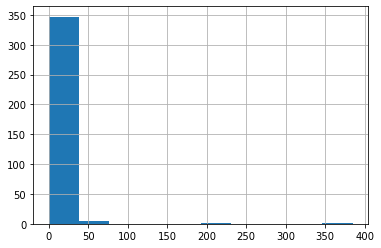

In [13]:
math_stat_f.absences.hist()

## Анализ выбросов

Посмотрим на boxplot для всех числовых столбцов

Medu float64


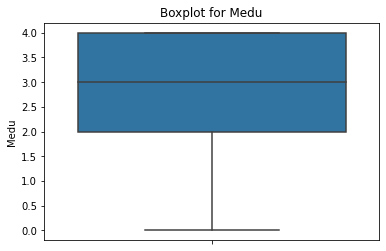

Fedu float64


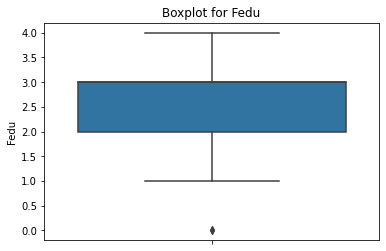

traveltime float64


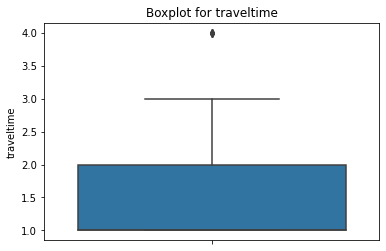

studytime float64


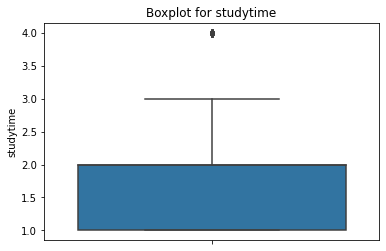

failures float64


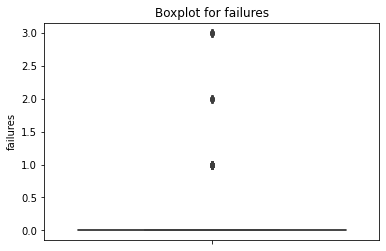

famrel float64


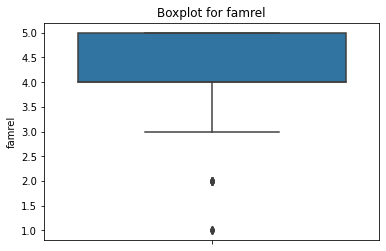

freetime float64


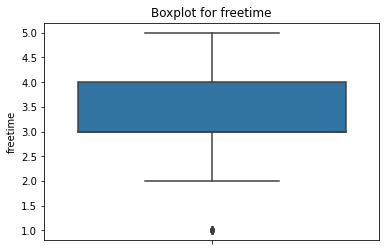

goout float64


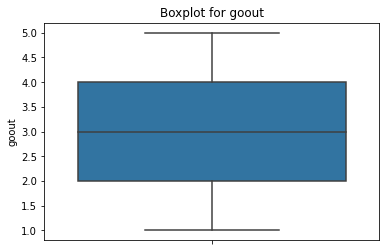

health float64


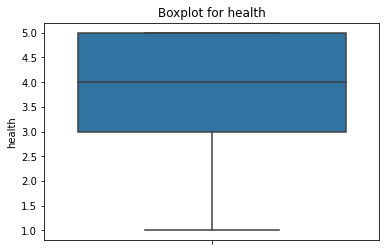

absences float64


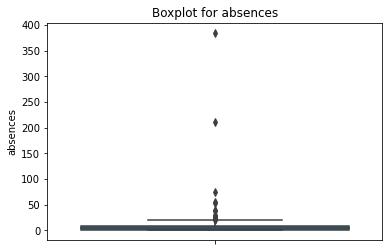

score float64


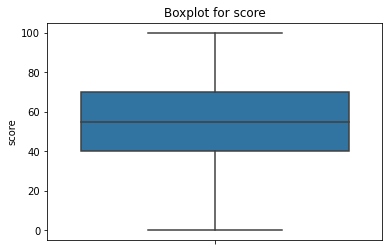

In [14]:
for column in math_stat_f.columns:
    # в нашем dataset представлены числовые данные только такого типа
    if math_stat_f[column].dtype == np.float64:
        print(column, math_stat_f[column].dtype)
        fig, ax = plt.subplots()
        sns.boxplot(y=column,
                    data=math_stat_f)
        # plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()

Видим выбросы в столбцах Fedu, traveltime, studytime, failures, famrel,  freetime, absences

### Столбец absences
Несмотря на то, что большое количество пропусков может быть причиной неуспеваемости (ниже строки dataframe для выбросов), для нашей модели нетипичное количество пропусков является фактором, который может повлиять на качество конечной модели. Поэтому строки с такими выбросами удалим.

In [15]:
IQR = math_stat_f.absences.quantile(0.75) - math_stat_f.absences.quantile(0.25)
perc25 = math_stat_f.absences.quantile(0.25)
perc75 = math_stat_f.absences.quantile(0.75)
print(IQR, perc25, perc75)

8.0 0.0 8.0


Проверим, какое количество строк не попадает в средние квартили.

In [16]:
len(math_stat_f.query(f'absences>{math_stat_f.absences.quantile(0.75)}').index)

79

In [17]:
math_stat_f.query(f'absences>{perc75}')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
69,GP,F,15,R,LE3,T,3.0,1.0,other,other,reputation,father,2.0,4.0,0.0,no,yes,no,no,no,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
82,GP,F,15,U,LE3,T,3.0,2.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,NaN,no,yes,yes,yes,no,4.0,4.0,4.0,5.0,10.0,30.0


В условии задания не описано за какой временной промежуток получена статистика. Некоторые значения, которые по анализу квартилей могут быть выбросами, кажутся вполне реальными. Поэтому сделаем дополнительный анализ выбросов из 4 квартиля.

<AxesSubplot:>

20.0


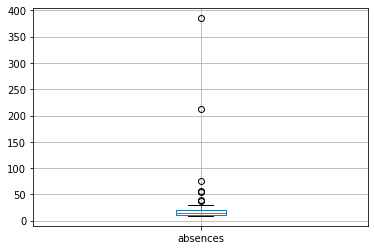

In [18]:
q4 = math_stat_f.query(f'absences>{math_stat_f.absences.quantile(0.75)}')
display(q4.boxplot(column=['absences']))
q4_perc75 = q4.absences.quantile(0.75)
print(q4_perc75)

In [19]:
math_stat_f.query(f'absences>{q4_perc75}')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
40,GP,F,16,U,LE3,T,2.0,2.0,other,other,home,mother,2.0,2.0,1.0,no,NaN,no,yes,no,yes,yes,yes,3.0,3.0,3.0,3.0,25.0,55.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
103,GP,F,15,U,GT3,T,3.0,2.0,services,other,home,mother,2.0,2.0,0.0,yes,yes,yes,no,yes,yes,yes,no,4.0,3.0,5.0,2.0,26.0,30.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
205,GP,F,17,U,GT3,T,3.0,4.0,at_home,services,home,mother,1.0,3.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,4.0,3.0,5.0,28.0,45.0
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
260,GP,F,18,U,GT3,NaN,4.0,3.0,NaN,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


После ручного анализа данных заметим, что значения, больше 30, являются нетипичными.

In [20]:
math_stat_f = math_stat_f.query(f'absences < 30')

### Столбец Fedu
Для построенных boxplot значение 0 (нет образования) является нетипичным. Посмотрим, сколько таких значений.

In [21]:
math_stat_f.query('Fedu == 0')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,NaN,no,yes,yes,yes,yes,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


In [22]:
len(math_stat_f.query('Fedu == 0').index)

2

Строк с таким значением несущественно мало (меньше 1%), поэтому удалим их.

In [23]:
math_stat_f = math_stat_f.query('Fedu != 0')

### Столбец traveltime
Проведем аналгичный анализ столбцов traveltime, studytime, famrel, freetime

In [24]:
len(math_stat_f.query('traveltime == 4').index)

7

Посмотрим на данные

In [25]:
math_stat_f.query('traveltime == 4')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,course,father,4.0,1.0,0.0,yes,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,GP,M,15,U,LE3,NaN,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,NaN,no,no,yes,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
228,GP,M,18,U,NaN,T,2.0,1.0,at_home,other,course,mother,4.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,GP,M,17,R,GT3,T,2.0,2.0,services,other,course,mother,4.0,1.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,home,mother,4.0,3.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


Данные достаточно грязные (много NaN значений). Поэтому удалим их.

In [26]:
math_stat_f = math_stat_f.query('traveltime != 4')

Посмотрим на другие столбцы.

In [27]:
# для famrel проведем анализ отдельно для значений 1 и 2
math_stat_f.famrel.value_counts()

4.0    152
5.0     86
3.0     53
2.0     13
1.0      6
Name: famrel, dtype: int64

In [28]:
math_stat_f.query('famrel == 1')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
184,GP,F,16,U,GT3,T,3.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,NaN,no,yes,yes,yes,no,1.0,2.0,2.0,1.0,14.0,60.0
207,GP,F,16,U,GT3,T,4.0,3.0,teacher,other,other,mother,1.0,2.0,0.0,no,no,yes,NaN,yes,yes,yes,yes,1.0,3.0,2.0,1.0,10.0,65.0
299,GP,M,18,U,LE3,T,4.0,4.0,teacher,teacher,home,mother,1.0,1.0,0.0,no,yes,yes,no,yes,yes,yes,yes,1.0,4.0,2.0,1.0,5.0,80.0
357,MS,F,17,U,LE3,NaN,3.0,2.0,services,other,reputation,mother,2.0,2.0,0.0,no,no,no,no,yes,yes,no,yes,1.0,2.0,3.0,5.0,2.0,55.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0


In [29]:
math_stat_f.query('famrel == 2')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
206,GP,F,16,U,GT3,A,3.0,1.0,services,other,course,mother,1.0,2.0,3.0,no,yes,yes,no,yes,yes,yes,no,2.0,3.0,3.0,4.0,5.0,35.0
238,GP,F,17,R,GT3,T,2.0,1.0,at_home,services,course,mother,3.0,2.0,0.0,no,no,no,yes,yes,yes,no,no,2.0,1.0,1.0,3.0,2.0,55.0
240,GP,M,17,U,LE3,T,4.0,3.0,health,other,course,NaN,2.0,2.0,0.0,no,no,no,yes,yes,yes,yes,yes,2.0,5.0,5.0,5.0,14.0,60.0
278,GP,F,18,U,GT3,T,4.0,4.0,health,health,reputation,father,1.0,2.0,1.0,yes,yes,no,yes,yes,yes,yes,yes,2.0,4.0,4.0,4.0,15.0,40.0


Пока оставим данные строки. Пометим, famrel == 1 как возможные к удалению.

In [30]:
math_stat_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 393
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      336 non-null    object 
 1   sex         336 non-null    object 
 2   age         336 non-null    int64  
 3   address     324 non-null    object 
 4   famsize     318 non-null    object 
 5   Pstatus     303 non-null    object 
 6   Medu        336 non-null    float64
 7   Fedu        313 non-null    float64
 8   Mjob        318 non-null    object 
 9   Fjob        304 non-null    object 
 10  reason      321 non-null    object 
 11  guardian    308 non-null    object 
 12  traveltime  311 non-null    float64
 13  studytime   336 non-null    float64
 14  failures    318 non-null    float64
 15  schoolsup   336 non-null    object 
 16  famsup      304 non-null    object 
 17  paid        300 non-null    object 
 18  activities  322 non-null    object 
 19  nursery     321 non-null    o

построим гистограммы для полученной выборки

Medu float64


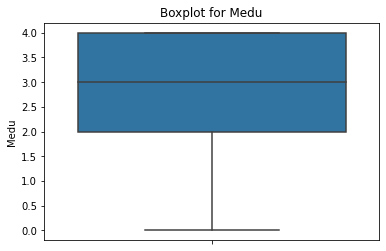

Fedu float64


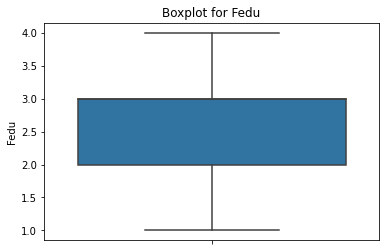

traveltime float64


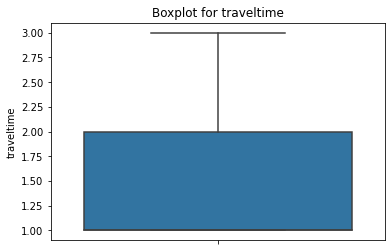

studytime float64


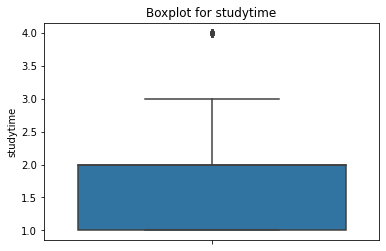

failures float64


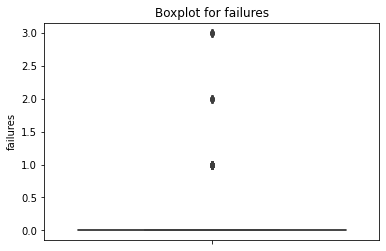

famrel float64


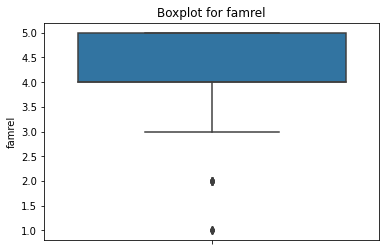

freetime float64


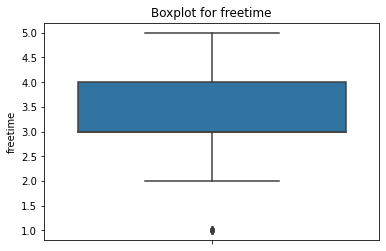

goout float64


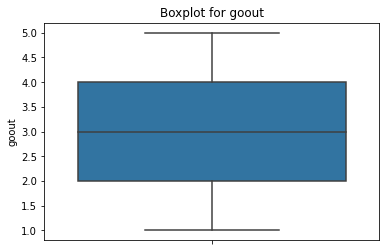

health float64


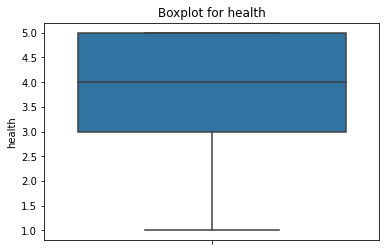

absences float64


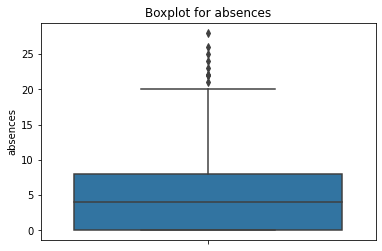

score float64


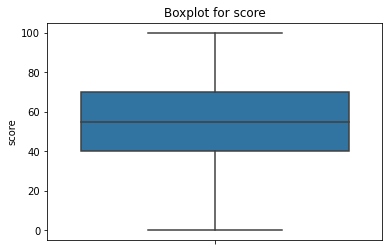

In [31]:
for column in math_stat_f.columns:
    # в нашем dataset представлены числовые данные только такого типа
    if math_stat_f[column].dtype == np.float64:
        print(column, math_stat_f[column].dtype)
        fig, ax = plt.subplots()
        sns.boxplot(y=column,
                    data=math_stat_f)
        # plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()

Данные стали более чистыми. Столбец failures в нашем наборе является несущественным, так как все значения, кроме одного, на boxplot считаются выбросами. Посмотрим на коэффициенты корреляции.

In [32]:
math_stat_f.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.115551,-0.143092,0.127748,0.011810,0.159582,0.006311,0.020120,0.141580,-0.087902,0.166851,-0.134469
Medu,-0.115551,1.000000,0.625955,-0.163287,0.059316,-0.194297,0.006891,0.040187,0.044803,-0.037623,0.099719,0.202787
Fedu,-0.143092,0.625955,1.000000,-0.111308,-0.011623,-0.242062,-0.014086,0.013915,0.053303,0.023277,0.005211,0.116712
traveltime,0.127748,-0.163287,-0.111308,1.000000,-0.154647,0.016845,-0.074842,-0.061186,-0.029012,-0.024870,-0.019447,-0.094758
studytime,0.011810,0.059316,-0.011623,-0.154647,1.000000,-0.157412,0.049397,-0.116219,-0.039649,-0.044373,-0.077071,0.112813
failures,0.159582,-0.194297,-0.242062,0.016845,-0.157412,1.000000,-0.023893,0.073623,0.072426,0.070435,0.131255,-0.344302
famrel,0.006311,0.006891,-0.014086,-0.074842,0.049397,-0.023893,1.000000,0.158746,0.072717,0.086412,-0.088100,0.074728
freetime,0.020120,0.040187,0.013915,-0.061186,-0.116219,0.073623,0.158746,1.000000,0.274177,0.081528,0.069343,0.027939
goout,0.141580,0.044803,0.053303,-0.029012,-0.039649,0.072426,0.072717,0.274177,1.000000,0.018525,0.137175,-0.155077
health,-0.087902,-0.037623,0.023277,-0.024870,-0.044373,0.070435,0.086412,0.081528,0.018525,1.000000,-0.069904,-0.040072


### Заполнение пробелов + работа с номинативными переменными с ограниченным количеством значений
#### Заполнение пробелов медианными значениями

In [33]:
math_stat_med = math_stat_f.copy()

In [34]:
for column in math_stat_med.columns:
    # в нашем dataset представлены числовые данные только такого типа
    if math_stat_med[column].dtype == np.float64:
        math_stat_med[column] = math_stat_med[column].fillna(
            math_stat_med[column].median())

In [35]:
math_stat_med.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.115551,-0.140945,0.124843,0.011810,0.158667,0.006152,0.018676,0.141580,-0.085176,0.166851,-0.134469
Medu,-0.115551,1.000000,0.605588,-0.145680,0.059316,-0.194244,0.006358,0.039036,0.044803,-0.043575,0.099719,0.202787
Fedu,-0.140945,0.605588,1.000000,-0.103976,-0.005484,-0.228519,-0.015367,0.022277,0.052216,0.023117,0.006505,0.111074
traveltime,0.124843,-0.145680,-0.103976,1.000000,-0.146616,0.007072,-0.070808,-0.048908,-0.016632,-0.051441,-0.009423,-0.076730
studytime,0.011810,0.059316,-0.005484,-0.146616,1.000000,-0.146078,0.047529,-0.116134,-0.039649,-0.039243,-0.077071,0.112813
failures,0.158667,-0.194244,-0.228519,0.007072,-0.146078,1.000000,-0.035713,0.073828,0.071365,0.060724,0.124231,-0.335283
famrel,0.006152,0.006358,-0.015367,-0.070808,0.047529,-0.035713,1.000000,0.153626,0.069679,0.082614,-0.084345,0.071314
freetime,0.018676,0.039036,0.022277,-0.048908,-0.116134,0.073828,0.153626,1.000000,0.274802,0.080962,0.067328,0.026136
goout,0.141580,0.044803,0.052216,-0.016632,-0.039649,0.071365,0.069679,0.274802,1.000000,0.016255,0.137175,-0.155077
health,-0.085176,-0.043575,0.023117,-0.051441,-0.039243,0.060724,0.082614,0.080962,0.016255,1.000000,-0.070802,-0.042960


Проанализируем все столбцы типа да/нет.

In [36]:
cols = ["schoolsup", "famsup", "paid", "activities",
        "nursery", "higher", "internet", "romantic"]

display("Count of rows: " + str(len(math_stat_med.index)))
for col in cols:
    display(math_stat_med[col].value_counts())

'Count of rows: 336'

no     295
yes     41
Name: schoolsup, dtype: int64

yes    189
no     115
Name: famsup, dtype: int64

no     168
yes    132
Name: paid, dtype: int64

yes    167
no     155
Name: activities, dtype: int64

yes    253
no      68
Name: nursery, dtype: int64

yes    307
no      14
Name: higher, dtype: int64

yes    260
no      44
Name: internet, dtype: int64

no     205
yes    105
Name: romantic, dtype: int64

Для дальнейшего анализа заменим значения yes на 1, no на 0.

In [37]:
cols = ["schoolsup", "famsup", "paid", "activities",
        "nursery", "higher", "internet", "romantic"]

for col in cols:
    math_stat_med[col] = math_stat_med[col].replace(["no", "yes"], [0, 1])

Также только пару значений имеют поля address, Pstatus, famsize. Проведем аналогичную операцию для них. Заменим соответственно значениям в словаре nornal_values - нулевой элемент на 0, первый - на 1.

In [38]:
for col in ['address', 'Pstatus', 'famsize']:
    math_stat_med[col] = math_stat_med[col].replace(normal_values[col], [0, 1])        

In [39]:
math_stat_med.corr()

,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,0.148491,-0.005860,-0.044124,-0.115551,-0.140945,0.124843,0.011810,0.158667,-0.268289,-0.148115,-0.029175,-0.050413,-0.085208,-0.202682,-0.122227,0.141822,0.006152,0.018676,0.141580,-0.085176,0.166851,-0.134469
address,0.148491,1.000000,0.061646,-0.077352,-0.175519,-0.128090,0.276616,0.021746,0.102770,-0.017361,-0.018193,-0.068523,0.045674,-0.065691,-0.033007,-0.266043,0.022885,0.026742,-0.041076,-0.081756,0.050691,-0.005278,-0.146215
famsize,-0.005860,0.061646,1.000000,-0.045258,0.065877,0.092362,-0.084893,0.073136,0.033413,0.003402,0.145055,0.104322,-0.001496,-0.085196,-0.020900,-0.037537,-0.016150,0.032297,-0.038022,0.026715,0.041996,-0.042169,-0.090389
Pstatus,-0.044124,-0.077352,-0.045258,1.000000,0.101017,0.092158,-0.095958,0.002078,-0.008010,0.077977,0.009903,-0.071348,-0.092949,0.077121,0.069254,-0.045849,0.067650,-0.027894,-0.025541,-0.034234,-0.052275,0.093374,0.069980
Medu,-0.115551,-0.175519,0.065877,0.101017,1.000000,0.605588,-0.145680,0.059316,-0.194244,-0.012068,0.199035,0.138282,0.080611,0.159663,0.158357,0.204504,0.048038,0.006358,0.039036,0.044803,-0.043575,0.099719,0.202787
Fedu,-0.140945,-0.128090,0.092362,0.092158,0.605588,1.000000,-0.103976,-0.005484,-0.228519,0.078379,0.167611,0.056371,0.108101,0.131862,0.193828,0.121037,0.037313,-0.015367,0.022277,0.052216,0.023117,0.006505,0.111074
traveltime,0.124843,0.276616,-0.084893,-0.095958,-0.145680,-0.103976,1.000000,-0.146616,0.007072,-0.048403,-0.021215,-0.032402,-0.033900,-0.077268,-0.077306,-0.127770,-0.022405,-0.070808,-0.048908,-0.016632,-0.051441,-0.009423,-0.076730
studytime,0.011810,0.021746,0.073136,0.002078,0.059316,-0.005484,-0.146616,1.000000,-0.146078,0.040665,0.115753,0.212391,0.085370,0.074406,0.177292,0.055352,0.053344,0.047529,-0.116134,-0.039649,-0.039243,-0.077071,0.112813
failures,0.158667,0.102770,0.033413,-0.008010,-0.194244,-0.228519,0.007072,-0.146078,1.000000,0.059561,-0.027377,-0.175541,-0.043343,-0.100328,-0.221845,-0.023119,0.085803,-0.035713,0.073828,0.071365,0.060724,0.124231,-0.335283
schoolsup,-0.268289,-0.017361,0.003402,0.077977,-0.012068,0.078379,-0.048403,0.040665,0.059561,1.000000,0.082916,-0.017358,0.027637,0.034014,0.034386,0.035028,-0.059668,-0.007009,-0.047484,-0.001435,-0.076237,0.011537,-0.103062


Удалим столбцы с коэффициентом корреляции меньше 10%

In [40]:
math_stat_med.drop(['famsize', 'Pstatus', 'traveltime', 'famsup', 'paid', 'activities',
                    'nursery', 'internet', 'famrel', 'freetime', 'health', 'absences'],  axis='columns', inplace=True)

In [41]:
math_stat_med.corr()

,age,address,Medu,Fedu,studytime,failures,schoolsup,higher,romantic,goout,score
age,1.000000,0.148491,-0.115551,-0.140945,0.011810,0.158667,-0.268289,-0.202682,0.141822,0.141580,-0.134469
address,0.148491,1.000000,-0.175519,-0.128090,0.021746,0.102770,-0.017361,-0.033007,0.022885,-0.081756,-0.146215
Medu,-0.115551,-0.175519,1.000000,0.605588,0.059316,-0.194244,-0.012068,0.158357,0.048038,0.044803,0.202787
Fedu,-0.140945,-0.128090,0.605588,1.000000,-0.005484,-0.228519,0.078379,0.193828,0.037313,0.052216,0.111074
studytime,0.011810,0.021746,0.059316,-0.005484,1.000000,-0.146078,0.040665,0.177292,0.053344,-0.039649,0.112813
failures,0.158667,0.102770,-0.194244,-0.228519,-0.146078,1.000000,0.059561,-0.221845,0.085803,0.071365,-0.335283
schoolsup,-0.268289,-0.017361,-0.012068,0.078379,0.040665,0.059561,1.000000,0.034386,-0.059668,-0.001435,-0.103062
higher,-0.202682,-0.033007,0.158357,0.193828,0.177292,-0.221845,0.034386,1.000000,-0.074621,0.000652,0.136712
romantic,0.141822,0.022885,0.048038,0.037313,0.053344,0.085803,-0.059668,-0.074621,1.000000,0.001292,-0.140413
goout,0.141580,-0.081756,0.044803,0.052216,-0.039649,0.071365,-0.001435,0.000652,0.001292,1.000000,-0.155077


Попробуем заменить все пропуски на медианное значение.

In [42]:
math_stat_f_med_test = math_stat_med.copy()

for column in math_stat_f_med_test.columns:
    # в нашем dataset представлены числовые данные только такого типа
    if math_stat_f_med_test[column].dtype == np.float64:
        math_stat_f_med_test[column] = math_stat_f_med_test[column].fillna(
            math_stat_f_med_test[column].median())

In [43]:
math_stat_f_med_test.corr()

,age,address,Medu,Fedu,studytime,failures,schoolsup,higher,romantic,goout,score
age,1.000000,0.143103,-0.115551,-0.140945,0.011810,0.158667,-0.268289,-0.200771,0.150400,0.141580,-0.134469
address,0.143103,1.000000,-0.174681,-0.119717,0.018828,0.096701,-0.014783,-0.038004,0.012779,-0.089940,-0.147993
Medu,-0.115551,-0.174681,1.000000,0.605588,0.059316,-0.194244,-0.012068,0.157313,0.049751,0.044803,0.202787
Fedu,-0.140945,-0.119717,0.605588,1.000000,-0.005484,-0.228519,0.078379,0.192446,0.032091,0.052216,0.111074
studytime,0.011810,0.018828,0.059316,-0.005484,1.000000,-0.146078,0.040665,0.170745,0.048130,-0.039649,0.112813
failures,0.158667,0.096701,-0.194244,-0.228519,-0.146078,1.000000,0.059561,-0.222260,0.088862,0.071365,-0.335283
schoolsup,-0.268289,-0.014783,-0.012068,0.078379,0.040665,0.059561,1.000000,0.032232,-0.055173,-0.001435,-0.103062
higher,-0.200771,-0.038004,0.157313,0.192446,0.170745,-0.222260,0.032232,1.000000,-0.084348,0.001135,0.135818
romantic,0.150400,0.012779,0.049751,0.032091,0.048130,0.088862,-0.055173,-0.084348,1.000000,-0.000734,-0.139301
goout,0.141580,-0.089940,0.044803,0.052216,-0.039649,0.071365,-0.001435,0.001135,-0.000734,1.000000,-0.155077


Коэффициенты корреляции изменились незначительно, значит замена на медианные значения не делает набор данных менее репрезентативным.

In [44]:
for column in math_stat_med.columns:
    # в нашем dataset представлены числовые данные только такого типа
    if math_stat_med[column].dtype == np.float64:
        math_stat_med[column] = math_stat_med[column].fillna(
            math_stat_med[column].median())

#### Заполнение пропусков новым значением (расширение шкалы)
Подставим вместо пропусков значение "-1"

In [45]:
math_stat_new = math_stat_f.copy()


for column in math_stat_new.columns:
    # в нашем dataset представлены числовые данные только такого типа
    if math_stat_new[column].dtype == np.float64:
        math_stat_new[column] = math_stat_new[column].fillna(-1)
        
math_stat_new.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.115551,-0.084889,0.099074,0.011810,0.161746,-0.004048,-0.001580,0.141580,-0.082652,0.166851,-0.134469
Medu,-0.115551,1.000000,0.430662,-0.071949,0.059316,-0.191419,0.022664,0.022816,0.044803,0.027946,0.099719,0.202787
Fedu,-0.084889,0.430662,1.000000,0.052896,-0.042947,-0.177724,0.050656,-0.001522,0.029627,0.040485,-0.005105,0.080934
traveltime,0.099074,-0.071949,0.052896,1.000000,-0.098067,-0.014092,-0.015328,-0.034421,0.026327,-0.081612,0.025038,-0.014752
studytime,0.011810,0.059316,-0.042947,-0.098067,1.000000,-0.115552,0.041166,-0.121562,-0.039649,-0.068731,-0.077071,0.112813
failures,0.161746,-0.191419,-0.177724,-0.014092,-0.115552,1.000000,-0.066345,0.082469,0.070916,0.087787,0.109710,-0.315641
famrel,-0.004048,0.022664,0.050656,-0.015328,0.041166,-0.066345,1.000000,0.077928,0.011922,-0.059089,-0.041764,0.046377
freetime,-0.001580,0.022816,-0.001522,-0.034421,-0.121562,0.082469,0.077928,1.000000,0.291125,0.043086,0.043718,0.001284
goout,0.141580,0.044803,0.029627,0.026327,-0.039649,0.070916,0.011922,0.291125,1.000000,0.030537,0.137175,-0.155077
health,-0.082652,0.027946,0.040485,-0.081612,-0.068731,0.087787,-0.059089,0.043086,0.030537,1.000000,-0.043516,-0.000724


Заметим, что коэффициент корелляции стали более чувствительными к известным значениям. Так, например, время пути до школы traveltime коррелирует с итоговой оценкой меньше. В то время, как образование отца и количество проведенного с друзьями времени (Fedu, goout) наоборот стали более значимыми.

In [46]:
math_stat_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 393
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      336 non-null    object 
 1   sex         336 non-null    object 
 2   age         336 non-null    int64  
 3   address     324 non-null    object 
 4   famsize     318 non-null    object 
 5   Pstatus     303 non-null    object 
 6   Medu        336 non-null    float64
 7   Fedu        336 non-null    float64
 8   Mjob        318 non-null    object 
 9   Fjob        304 non-null    object 
 10  reason      321 non-null    object 
 11  guardian    308 non-null    object 
 12  traveltime  336 non-null    float64
 13  studytime   336 non-null    float64
 14  failures    336 non-null    float64
 15  schoolsup   336 non-null    object 
 16  famsup      304 non-null    object 
 17  paid        300 non-null    object 
 18  activities  322 non-null    object 
 19  nursery     321 non-null    o

Аналогично предыдущему рассуждению заменим поля, которые принимают пару значений на 0 и 1. 

In [47]:
for col in ["schoolsup", "famsup", "paid", "activities",
            "nursery", "higher", "internet", "romantic"]:
    math_stat_new[col] = math_stat_new[col].replace(["no", "yes"], [0, 1])
    math_stat_new[col] = math_stat_new[col].fillna(-1)

for col in ['address', 'Pstatus', 'famsize']:
    math_stat_new[col] = math_stat_new[col].replace(normal_values[col], [0, 1])
    math_stat_new[col] = math_stat_new[col].fillna(-1)
    
math_stat_new.corr()

,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,0.119786,-0.019739,-0.042001,-0.115551,-0.084889,0.099074,0.011810,0.161746,-0.268289,-0.110731,0.004211,0.028244,-0.108808,-0.059182,-0.068179,0.161817,-0.004048,-0.001580,0.141580,-0.082652,0.166851,-0.134469
address,0.119786,1.000000,-0.007652,0.005151,-0.166482,-0.021728,0.149750,0.006317,0.048003,-0.003900,0.052449,-0.077755,0.057089,-0.044618,0.024518,-0.110510,0.001416,-0.013154,-0.073468,-0.120350,0.022530,0.014422,-0.148583
famsize,-0.019739,-0.007652,1.000000,0.026160,0.077966,0.097573,-0.095363,0.094532,0.021615,0.007725,0.225190,0.120225,-0.001499,-0.065857,-0.086143,-0.006538,-0.089178,-0.004176,-0.018738,0.078265,0.012576,-0.027175,-0.063683
Pstatus,-0.042001,0.005151,0.026160,1.000000,0.111243,0.003166,-0.060289,0.016897,0.097624,0.025921,0.061057,-0.025607,-0.048450,0.005224,0.026303,-0.070875,0.099865,-0.068490,0.038573,-0.017740,-0.013663,0.037507,0.014545
Medu,-0.115551,-0.166482,0.077966,0.111243,1.000000,0.430662,-0.071949,0.059316,-0.191419,-0.012068,0.091260,0.054124,0.077646,0.151437,0.035932,0.142458,0.050349,0.022664,0.022816,0.044803,0.027946,0.099719,0.202787
Fedu,-0.084889,-0.021728,0.097573,0.003166,0.430662,1.000000,0.052896,-0.042947,-0.177724,0.027201,0.113881,-0.000967,0.025613,0.047977,0.062595,-0.027164,0.004079,0.050656,-0.001522,0.029627,0.040485,-0.005105,0.080934
traveltime,0.099074,0.149750,-0.095363,-0.060289,-0.071949,0.052896,1.000000,-0.098067,-0.014092,0.010317,0.002219,0.009993,-0.022350,-0.047454,-0.064174,-0.001167,0.039718,-0.015328,-0.034421,0.026327,-0.081612,0.025038,-0.014752
studytime,0.011810,0.006317,0.094532,0.016897,0.059316,-0.042947,-0.098067,1.000000,-0.115552,0.040665,0.092856,0.231867,0.096076,0.040208,0.134781,0.146641,0.034894,0.041166,-0.121562,-0.039649,-0.068731,-0.077071,0.112813
failures,0.161746,0.048003,0.021615,0.097624,-0.191419,-0.177724,-0.014092,-0.115552,1.000000,0.057301,-0.061325,-0.075575,-0.021673,-0.123878,0.009792,-0.014339,0.097858,-0.066345,0.082469,0.070916,0.087787,0.109710,-0.315641
schoolsup,-0.268289,-0.003900,0.007725,0.025921,-0.012068,0.027201,0.010317,0.040665,0.057301,1.000000,0.052705,-0.024099,-0.105357,0.049452,0.047800,-0.011685,-0.041497,0.001184,-0.017159,-0.001435,-0.019637,0.011537,-0.103062


Оставим только значительные параметры с коэффициентом корреляции >10%

In [48]:
math_stat_new.drop(['famsize', 'Pstatus', 'Fedu', 'traveltime', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'famrel', 'freetime', 'health', 'absences'],  axis='columns', inplace=True)

In [49]:
math_stat_new.corr()

,age,address,Medu,studytime,failures,schoolsup,romantic,goout,score
age,1.000000,0.119786,-0.115551,0.011810,0.161746,-0.268289,0.161817,0.141580,-0.134469
address,0.119786,1.000000,-0.166482,0.006317,0.048003,-0.003900,0.001416,-0.120350,-0.148583
Medu,-0.115551,-0.166482,1.000000,0.059316,-0.191419,-0.012068,0.050349,0.044803,0.202787
studytime,0.011810,0.006317,0.059316,1.000000,-0.115552,0.040665,0.034894,-0.039649,0.112813
failures,0.161746,0.048003,-0.191419,-0.115552,1.000000,0.057301,0.097858,0.070916,-0.315641
schoolsup,-0.268289,-0.003900,-0.012068,0.040665,0.057301,1.000000,-0.041497,-0.001435,-0.103062
romantic,0.161817,0.001416,0.050349,0.034894,0.097858,-0.041497,1.000000,-0.005236,-0.122873
goout,0.141580,-0.120350,0.044803,-0.039649,0.070916,-0.001435,-0.005236,1.000000,-0.155077
score,-0.134469,-0.148583,0.202787,0.112813,-0.315641,-0.103062,-0.122873,-0.155077,1.000000


## Анализ номитативных переменных

In [50]:
math_stat_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 393
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school     336 non-null    object 
 1   sex        336 non-null    object 
 2   age        336 non-null    int64  
 3   address    336 non-null    float64
 4   Medu       336 non-null    float64
 5   Fedu       336 non-null    float64
 6   Mjob       318 non-null    object 
 7   Fjob       304 non-null    object 
 8   reason     321 non-null    object 
 9   guardian   308 non-null    object 
 10  studytime  336 non-null    float64
 11  failures   336 non-null    float64
 12  schoolsup  336 non-null    int64  
 13  higher     336 non-null    float64
 14  romantic   336 non-null    float64
 15  goout      336 non-null    float64
 16  score      336 non-null    float64
dtypes: float64(9), int64(2), object(6)
memory usage: 47.2+ KB


In [51]:
math_stat_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 393
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school     336 non-null    object 
 1   sex        336 non-null    object 
 2   age        336 non-null    int64  
 3   address    336 non-null    float64
 4   Medu       336 non-null    float64
 5   Mjob       318 non-null    object 
 6   Fjob       304 non-null    object 
 7   reason     321 non-null    object 
 8   guardian   308 non-null    object 
 9   studytime  336 non-null    float64
 10  failures   336 non-null    float64
 11  schoolsup  336 non-null    int64  
 12  romantic   336 non-null    float64
 13  goout      336 non-null    float64
 14  score      336 non-null    float64
dtypes: float64(7), int64(2), object(6)
memory usage: 42.0+ KB


Есть два возможных решения: замена нулевых значений на other, либо на новое строковое значение, например, None

In [52]:
math_nom = math_stat_f[['Mjob', 'Fjob', 'reason', 'guardian', 'score']].copy()
math_nom_other = math_nom.fillna('other')
math_nom_none = math_nom.fillna('None')

Проверим важность номинативных перемнных, используя функцию из тренировочного проекта

In [53]:
def get_stat_dif(column, df):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col, math_nom_other)

In [54]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col, math_nom_none)

Видим, что значимой корреляции нет.

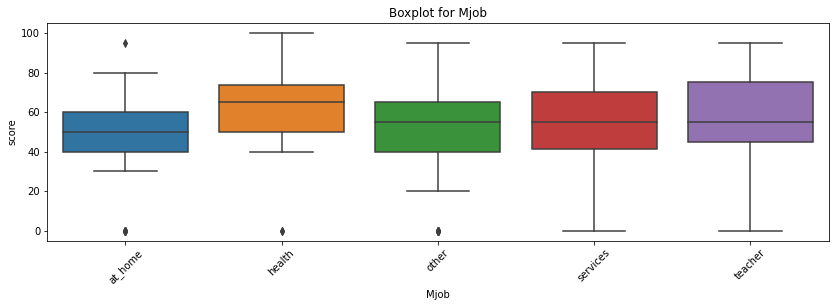

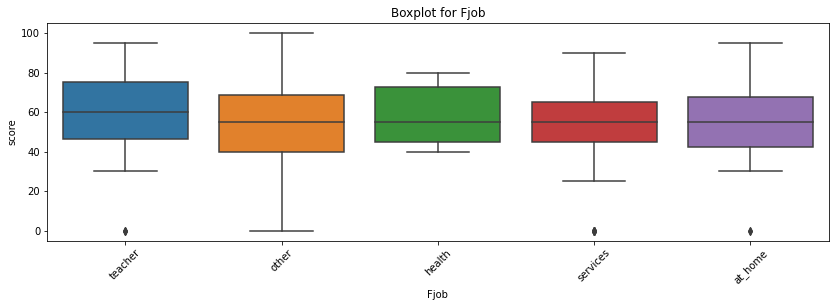

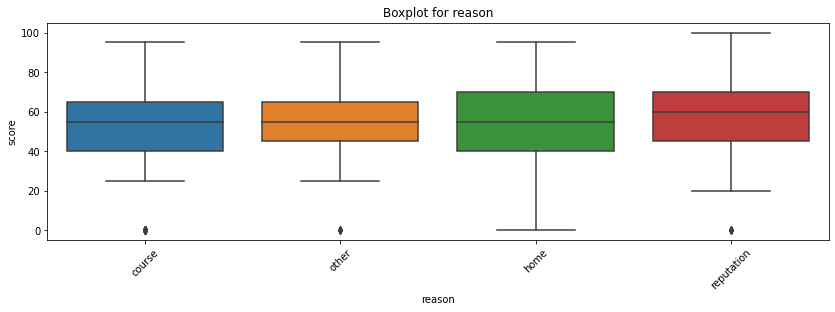

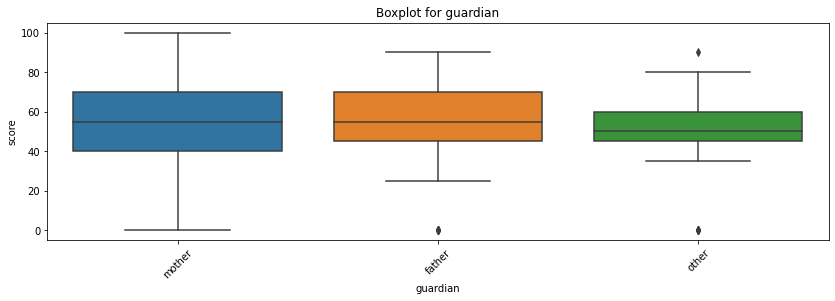

In [55]:
def get_boxplot(column, df):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col, math_nom_other)

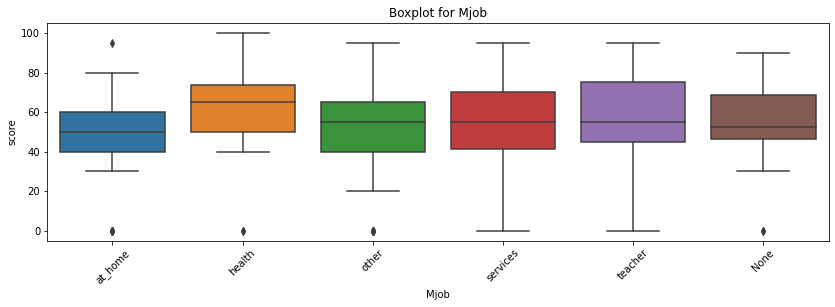

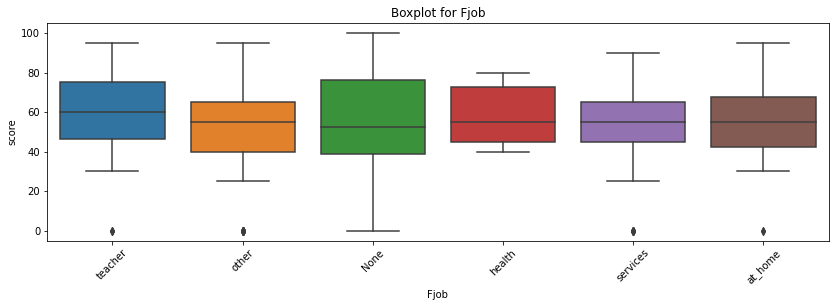

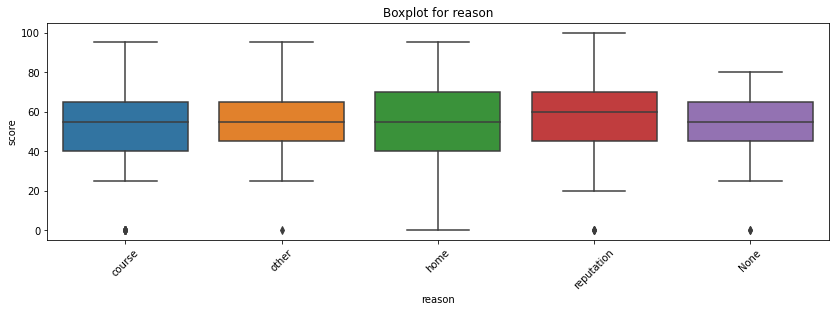

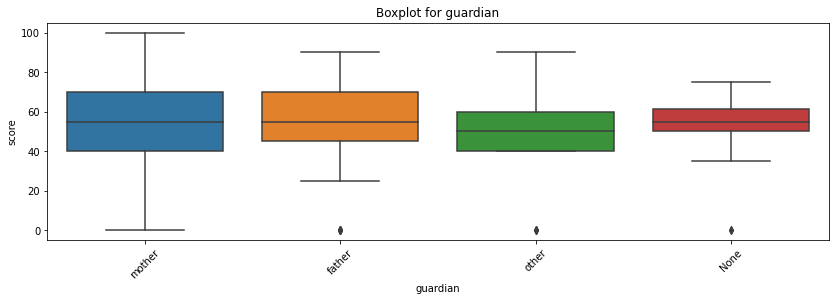

In [56]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col, math_nom_none)

Из boxplot видно, что разброс значений есть для переменной Mjob.

## Вывод
При замене null значений на медиану наблюдается большая корреляция между числовыми значениями и score. Однако при дальнейшем анализе такие значения будут неотличимы от "оригинальных". Поэтому для возможности более гибкого анализа лучше расширить шкалу и ввести значения, которые будут обозначать факт незаполненности данных в анкете.

Из номинативных переменных оставим только Mjob

In [57]:
math_stat_new.drop(['Fjob', 'reason', 'guardian'],  axis='columns', inplace=True)
math_stat_new = math_stat_new.fillna('None')
stat_for_model = math_stat_new.copy()

In [58]:
stat_for_model.head(50)

,school,sex,age,address,Medu,Mjob,studytime,failures,schoolsup,romantic,goout,score
0,GP,F,18,0.0,4.0,at_home,2.0,0.0,1,0.0,4.0,30.0
1,GP,F,17,0.0,1.0,at_home,2.0,0.0,0,0.0,3.0,30.0
2,GP,F,15,0.0,1.0,at_home,2.0,3.0,1,-1.0,2.0,50.0
3,GP,F,15,0.0,4.0,health,3.0,0.0,0,1.0,2.0,75.0
4,GP,F,16,0.0,3.0,other,2.0,0.0,0,0.0,2.0,50.0
5,GP,M,16,0.0,4.0,services,2.0,0.0,0,0.0,2.0,75.0
6,GP,M,16,-1.0,2.0,other,2.0,0.0,0,0.0,4.0,55.0
7,GP,F,17,0.0,4.0,other,2.0,0.0,1,0.0,4.0,30.0
8,GP,M,15,0.0,3.0,services,2.0,0.0,0,0.0,2.0,95.0
9,GP,M,15,0.0,3.0,other,2.0,0.0,0,0.0,1.0,75.0


In [59]:
stat_for_model.to_csv('Model.csv')